In [1]:
import numpy as np
import matplotlib.pyplot as plt
from   numpy.linalg import pinv
from   sklearn import model_selection
from   functools import partial

%matplotlib inline

In [2]:
plt.style.use("dark_background")

In [4]:
def f(x):
    return 3 * np.cos( x / 2.0) + x ** 2.0 / 5 + 3

In [5]:
def gaussian_kernel(x):
    pdf_const = 1 / np.sqrt( 2.0 * np.pi )
    return pdf_const * np.exp( - 0.5 * x ** 2 )

In [12]:
x_in = np.loadtxt("./xin")
y_in = np.loadtxt("./yin")

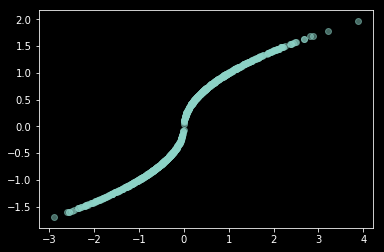

In [17]:
plt.figure()
plt.scatter(x=x_in, y=y_in, alpha=0.5)
plt.show()

In [32]:
def split_train_test(x, y, folds):
    if len(x) != len(y):
        raise ValueError("X and Y Should have same length")
    num_test = int(len(x) / float(folds)) 
    num_train = len(x) - num_test
    print(num_test, num_train)
    indices = np.random.permutation(x.shape[0])
    training_idx, test_idx = indices[:num_train], indices[num_train:]
    return x[training_idx], x[test_idx], y[training_idx], y[test_idx]

In [51]:
def split_k_fold(x, y, folds):
    if len(x) != len(y):
        raise ValueError("X and Y Should have same length")
    indices = np.arange(len(x))
    np.random.shuffle(indices)
    split_size = len(x) / folds
    return np.array([x[n * split_size:(n + 1) * split_size] for n in np.arange(folds)]), np.array(
        [y[n * split_size:(n + 1) * split_size] for n in np.arange(folds)])

In [52]:
x_splits, y_splits = split_k_fold(x_in, y_in, 10)

In [59]:
num_folds = 10

In [64]:
fold_indices = np.arange(num_folds)
for idx in fold_indices:
    test_idx = idx
    train_idx = np.setdiff1d(fold_indices, [idx])
    train_x, test_x, train_y, test_y = (np.concatenate(x_splits[train_idx]), 
                                        x_splits[test_idx], 
                                        np.concatenate(y_splits[train_idx]), 
                                        y_splits[test_idx])
    print(test_idx, train_idx, len(train_x), len(test_x))

(0, array([1, 2, 3, 4, 5, 6, 7, 8, 9]), 900, 100)
(1, array([0, 2, 3, 4, 5, 6, 7, 8, 9]), 900, 100)
(2, array([0, 1, 3, 4, 5, 6, 7, 8, 9]), 900, 100)
(3, array([0, 1, 2, 4, 5, 6, 7, 8, 9]), 900, 100)
(4, array([0, 1, 2, 3, 5, 6, 7, 8, 9]), 900, 100)
(5, array([0, 1, 2, 3, 4, 6, 7, 8, 9]), 900, 100)
(6, array([0, 1, 2, 3, 4, 5, 7, 8, 9]), 900, 100)
(7, array([0, 1, 2, 3, 4, 5, 6, 8, 9]), 900, 100)
(8, array([0, 1, 2, 3, 4, 5, 6, 7, 9]), 900, 100)
(9, array([0, 1, 2, 3, 4, 5, 6, 7, 8]), 900, 100)
